In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("Datasets/Dataset_EST.csv")
df

,path,age,gender,chroma_stft,rms,spec_cent,spec_bw,rolloff,zcr,mfcc1,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,common_voice_et_18901038.mp3,twenties,male,0.374634,0.079749,1249.345177,1203.207697,2307.273243,0.082681,-302.080444,...,-8.826464,-10.834477,10.817574,-7.072519,-10.444544,0.765793,-14.121457,-22.140944,-6.761722,-2.150890
1,common_voice_et_18901066.mp3,twenties,male,0.383847,0.110892,1204.333435,1286.444245,2417.378455,0.064155,-268.100250,...,-12.719922,-16.309513,7.994830,-10.375378,-6.568331,0.966675,-11.275705,-15.499236,-6.455009,0.583663
2,common_voice_et_18901181.mp3,twenties,male,0.364218,0.070047,1379.127304,1423.911530,2716.563806,0.075511,-314.360107,...,-7.936563,-12.572493,10.674406,-11.851406,-5.500381,1.062081,-13.736299,-16.380512,-5.947956,-3.221925
3,common_voice_et_18370776.mp3,twenties,male,0.310396,0.111130,1807.703459,1912.632073,3416.454075,0.089347,-326.293854,...,-8.634290,3.279876,-5.285153,-20.167999,-6.299458,6.274060,-9.958023,-11.580483,-12.518098,-11.603791
4,common_voice_et_18370777.mp3,twenties,male,0.324734,0.076138,2286.324053,2068.363770,4246.545870,0.125317,-353.009277,...,-8.040491,-3.846891,-5.987377,-11.603947,-5.618095,2.684305,-7.495813,-13.471592,-9.617217,-5.198622
5,common_voice_et_18370778.mp3,twenties,male,0.325377,0.084931,1635.496719,1645.562464,2959.159029,0.090253,-342.612885,...,-10.862323,0.345885,-5.634359,-13.242280,-1.833860,-0.299839,-11.992685,-9.984836,-7.444386,-8.737175
6,common_voice_et_18370779.mp3,twenties,male,0.276516,0.108821,1379.253547,1526.091359,2470.035844,0.070336,-298.136200,...,-10.626707,2.794096,-6.767774,-12.628787,-2.135501,-2.927792,-12.857910,-11.745236,-8.216407,-9.643083
7,common_voice_et_18136337.mp3,twenties,female,0.330436,0.087680,2791.056743,1915.656710,4717.087402,0.195969,-275.577728,...,-20.522268,-7.963370,1.837731,-3.244030,-6.087160,-10.401870,-11.484426,-5.316000,-9.789961,-6.547070
8,common_voice_et_18136338.mp3,twenties,female,0.320390,0.090774,2692.560554,1919.941648,4617.943187,0.186910,-269.901794,...,-10.078330,-12.879704,1.355656,-1.321482,-12.251980,-15.576886,-3.413646,-8.750150,-13.070326,-0.784116
9,common_voice_et_18136339.mp3,twenties,female,0.307859,0.090634,2306.692955,1686.101004,3950.411048,0.151342,-265.777893,...,-8.237616,-16.712004,4.022213,-3.100588,-15.961758,-13.155466,-3.200355,-8.488358,-10.426080,0.277048


# Lets see how balanced that data is

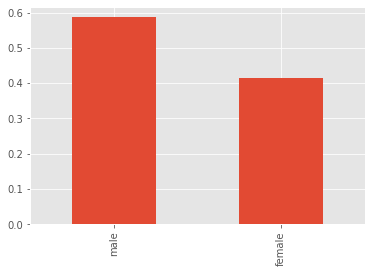

In [2]:
counts = df["gender"].value_counts()
counts = counts/sum(counts)
counts.plot(kind="bar")

In [3]:
# Making changes if needed

# Visualization

Lets have a look how different features look like for both male and female speakers

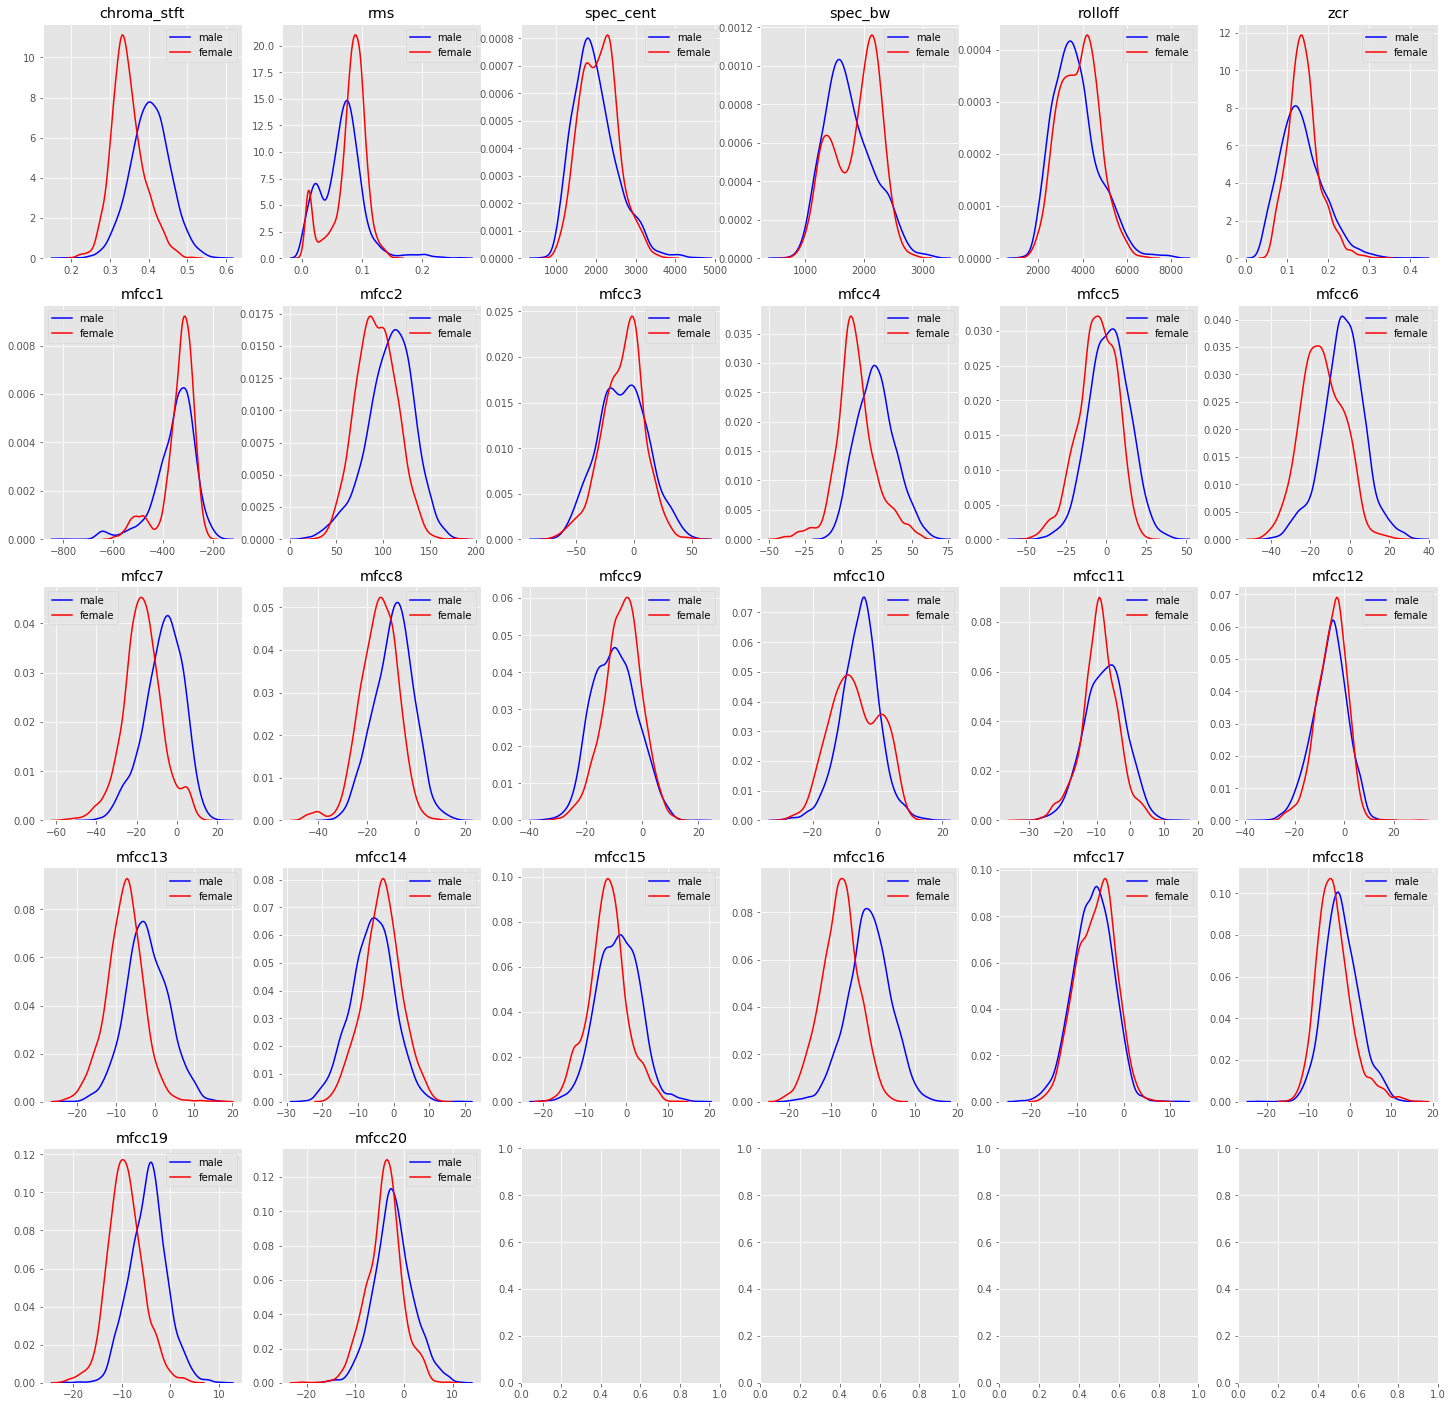

In [4]:
data = df.copy()
data = data.drop(["path"],axis=1)
data = data.drop(["age"],axis=1)
plt.subplots(5,6,figsize=(25,25))
i = 0
for column in data.columns:
    if column != "gender":
        plt.subplot(5,6,i)
        plt.title(column)
        male_subset = data.loc[data["gender"] == "male"]
        female_subset = data.loc[data["gender"]=="female"]
        sns.kdeplot(male_subset[column],color="blue",label="male")
        sns.kdeplot(female_subset[column],color="red",label="female")
    i += 1

# Creating some models and comparing them

First lets split the data and then train some models

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df[["chroma_stft","rms","spec_cent","spec_bw","rolloff","zcr","mfcc1","mfcc2","mfcc3","mfcc4","mfcc5","mfcc6","mfcc7","mfcc8","mfcc9","mfcc10","mfcc11","mfcc12","mfcc13","mfcc14","mfcc15","mfcc16","mfcc17","mfcc18","mfcc19","mfcc20"]],df.gender,train_size=0.7)

#Decision tree
dct = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)
dct_prediction = dct.predict(X_test)
print("Decision tree accuracy: "+str(accuracy_score(y_test,dct_prediction)))

#Random forest
rf = RandomForestClassifier(n_estimators=1000,max_depth=4).fit(X_train, y_train)
rf_prediction = rf.predict(X_test)
print("Random Forest accuracy: "+str(accuracy_score(y_test,rf_prediction)))

#SVM linear
svm_linear = SVC(kernel='linear',probability=True).fit(X_train,y_train)
svm_linear_prediction = svm_linear.predict(X_test)
print("SVM linear: "+str(accuracy_score(y_test,svm_linear_prediction)))

# SVM POLY
#svm_poly = SVC(kernel='poly', degree=2 ,gamma='auto',probability=True).fit(X_train,y_train)
#svm_poly_prediction = svm_poly.predict(X_test)
#print("SVM poly: "+str(accuracy_score(y_test,svm_poly_prediction)))

# SVM RBF
#svm_rbf = SVC(kernel='rbf',gamma='auto',probability=True).fit(X_train,y_train)
#svm_rbf_prediction = svm_rbf.predict(X_test)
#print("SVM RBF: "+str(accuracy_score(y_test,svm_rbf_prediction)))

Decision tree accuracy: 0.9255029907558455
Random Forest accuracy: 0.9483414899401849
SVM linear: 0.9543230016313213


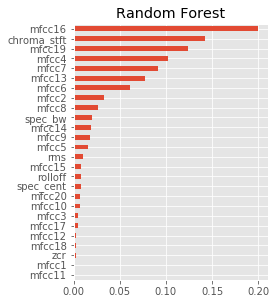

In [6]:
plt.subplots(figsize=(16, 16))
x = np.arange(-5,5,0.25)
y = np.arange(-5,5,0.25)
xx, yy = np.meshgrid(x, y)
df = pd.DataFrame({'x':xx.flatten(),'y':yy.flatten()})


feature_importances_rf = pd.Series(rf.feature_importances_, index= X_train.columns)
plt.subplot(3,4,1)
plt.title('Random Forest')
feature_importances_rf.sort_values().plot(kind='barh')

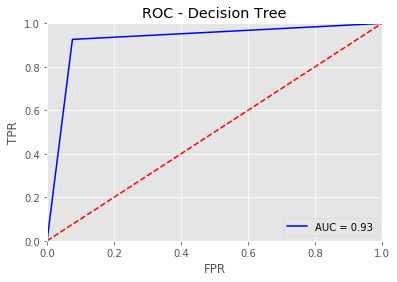

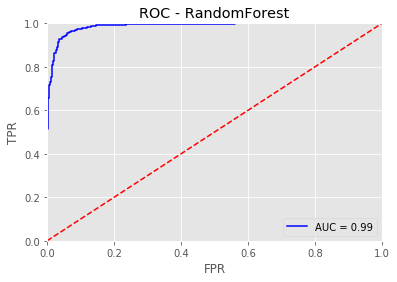

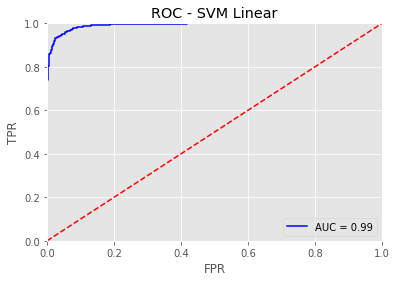

In [7]:
#WORK IN PROGRESS - ROC (https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python)
val = y_test.to_frame()
probs = dct.predict_proba(X_test)
probs = probs[:,1]
fpr,tpr,thresholds = metrics.roc_curve(val,probs,pos_label="male")
roc_auc = metrics.auc(fpr, tpr)
# ROC PLOT
plt.title('ROC - Decision Tree')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()


val = y_test.to_frame()
probs = rf.predict_proba(X_test)
probs = probs[:,1]
fpr,tpr,thresholds = metrics.roc_curve(val,probs,pos_label="male")
roc_auc = metrics.auc(fpr, tpr)
# ROC PLOT
plt.title('ROC - RandomForest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

val = y_test.to_frame()
probs = svm_linear.predict_proba(X_test)
probs = probs[:,1]
fpr,tpr,thresholds = metrics.roc_curve(val,probs,pos_label="male")
roc_auc = metrics.auc(fpr, tpr)
# ROC PLOT
plt.title('ROC - SVM Linear')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()